# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [22]:
#!pip install matplotlib
#!pip install seaborn
!pip install missingno

                                              0.0/44.1 MB ? eta -:--:--
                                              0.1/44.1 MB 8.3 MB/s eta 0:00:06
                                              0.9/44.1 MB 11.0 MB/s eta 0:00:04
     -                                        1.8/44.1 MB 14.3 MB/s eta 0:00:03
     --                                       2.5/44.1 MB 14.6 MB/s eta 0:00:03
     ---                                      3.5/44.1 MB 17.4 MB/s eta 0:00:03
     ---                                      4.0/44.1 MB 15.9 MB/s eta 0:00:03
     ----                                     5.4/44.1 MB 17.2 MB/s eta 0:00:03
     -----                                    6.6/44.1 MB 18.3 MB/s eta 0:00:03
     ------                                   7.3/44.1 MB 18.7 MB/s eta 0:00:02
     ------                                   7.3/44.1 MB 18.7 MB/s eta 0:00:02
     ------                                   7.3/44.1 MB 18.7 MB/s eta 0:00:02
     ------                                   7.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/minjeong/Downloads/airbnb_listings.csv", index_col=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17756\249448268.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/minjeong/Downloads/airbnb_listings.csv", index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [5]:
# Q1
pd.options.display.max_columns = None
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [6]:
# Q2

df2 = df[df.columns[df.isnull().sum() != 0]]
df3 = df2[df2.isnull().sum().sort_values(ascending=False).index]

df_missing_columns = df2.isnull().sum().sort_values(ascending=False).index
df_missing_num = df2.isnull().sum().sort_values(ascending=False)
df_missing_ratio = df3.isnull().sum() / len(df) *100

df4 = pd.DataFrame({'missing_value_columns': df_missing_columns, 'missing_value_num': df_missing_num, 'missing_value_ratio(%)': df_missing_ratio})
df4 = df4.reset_index(drop=True)
df4

,missing_value_columns,missing_value_num,missing_value_ratio(%)
0,jurisdiction_names,50781,99.970470
1,license,50759,99.927160
2,square_feet,50407,99.234192
3,monthly_price,46119,90.792582
4,weekly_price,45411,89.398772
5,host_response_rate,19006,37.416332
6,host_response_time,19006,37.416332
7,security_deposit,17325,34.107016
8,host_acceptance_rate,14015,27.590755
9,review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

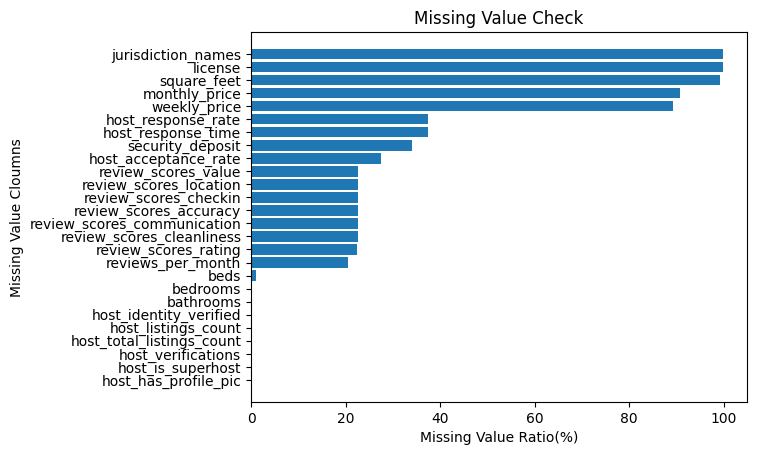

In [7]:
# Q3

f,ax = plt.subplots(1,1)

#레이블 지정
categories = list(df4['missing_value_columns'])
values = list(df4['missing_value_ratio(%)'])

#가로 막대 그래프
plt.barh(categories[::-1], values[::-1])

# 가로축의 레이블과 세로축의 레이블 추가
plt.xlabel('Missing Value Ratio(%)')
plt.ylabel('Missing Value Cloumns')

# 그래프 타이틀 추가
plt.title('Missing Value Check')

# 그래프 보여주기
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [8]:
# Q4

df[df['beds'].isnull() == True].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [9]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [10]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

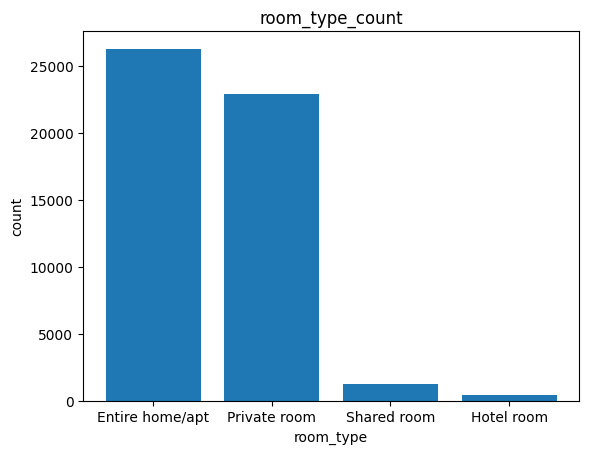

In [12]:
# Q5

f,ax = plt.subplots(1,1)

#레이블 지정
categories = list(pd.DataFrame(df['room_type'].value_counts()).index)
values = list(df['room_type'].value_counts())

#가로 막대 그래프
plt.bar(categories, values)

# 가로축의 레이블과 세로축의 레이블 추가
plt.xlabel('room_type')
plt.ylabel('count')

# 그래프 타이틀 추가
plt.title('room_type_count')

# 그래프 보여주기
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

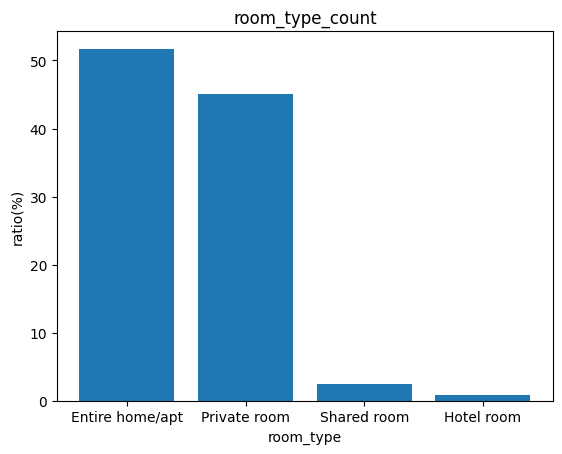

In [13]:
# Q6

f,ax = plt.subplots(1,1)

#레이블 지정
categories = list(pd.DataFrame(df['room_type'].value_counts()).index)
values = list((df['room_type'].value_counts() / len(df['room_type']) ) * 100)

#가로 막대 그래프
plt.bar(categories, values)

# 가로축의 레이블과 세로축의 레이블 추가
plt.xlabel('room_type')
plt.ylabel('ratio(%)')

# 그래프 타이틀 추가
plt.title('room_type_count')

# 그래프 보여주기
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

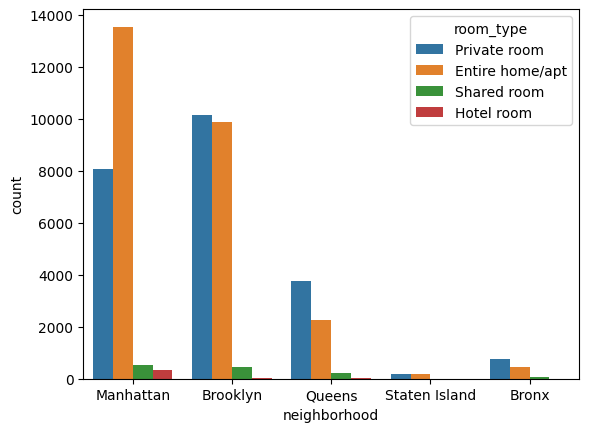

In [14]:
# Q7

f,ax = plt.subplots(1,1)
sns.countplot(x = "neighborhood", hue = "room_type", data = df) #count plot

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

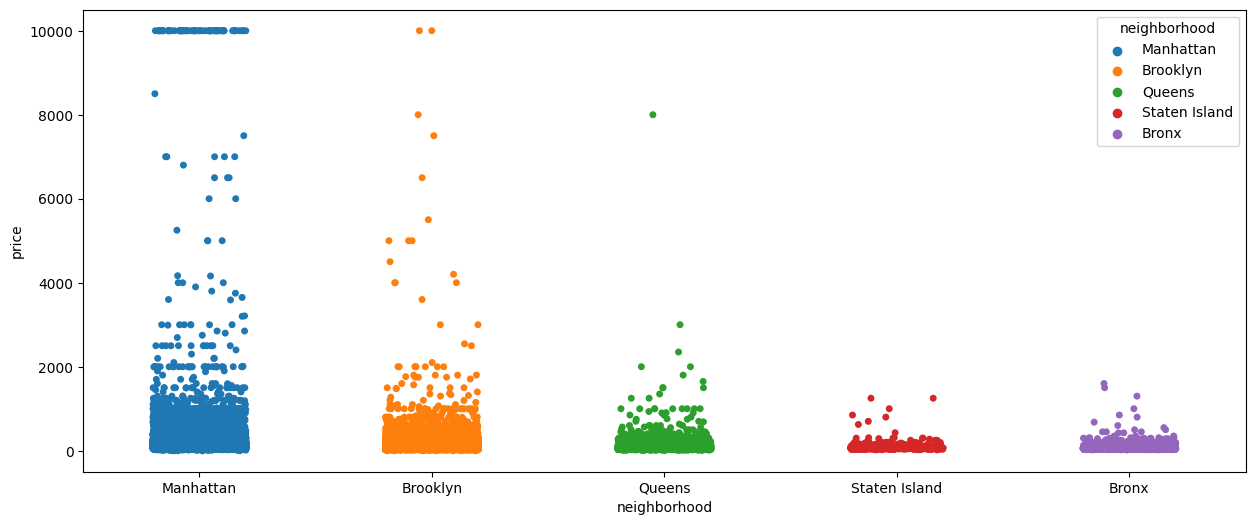

In [15]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요

plt.figure(figsize=(15, 6))
sns.stripplot( x = "neighborhood", y = "price",hue=  "neighborhood",data = df, jitter = 0.2)


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

가격의 분포가 평균적으로 높고, 특히 높은 가격대가 많이 분포 하는 도시일수록 private room보다는 entire home/apt를 훨씬 더 선호하는 경향을 보인다.

소득 혹은 지불 의사가 큰 호스트들은 크기가 큰 방을 원할 가능성이 크다는 것이 가장 직관적으로 떠올릴 수 있는 가설이다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.1006e+04, 5.5040e+03, 7.7540e+03, 2.0500e+03, 2.5020e+03,
        4.8500e+02, 7.5200e+02, 1.0700e+02, 2.5400e+02, 4.6000e+01,
        1.0800e+02, 2.0000e+01, 3.2000e+01, 1.7000e+01, 1.5600e+02,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

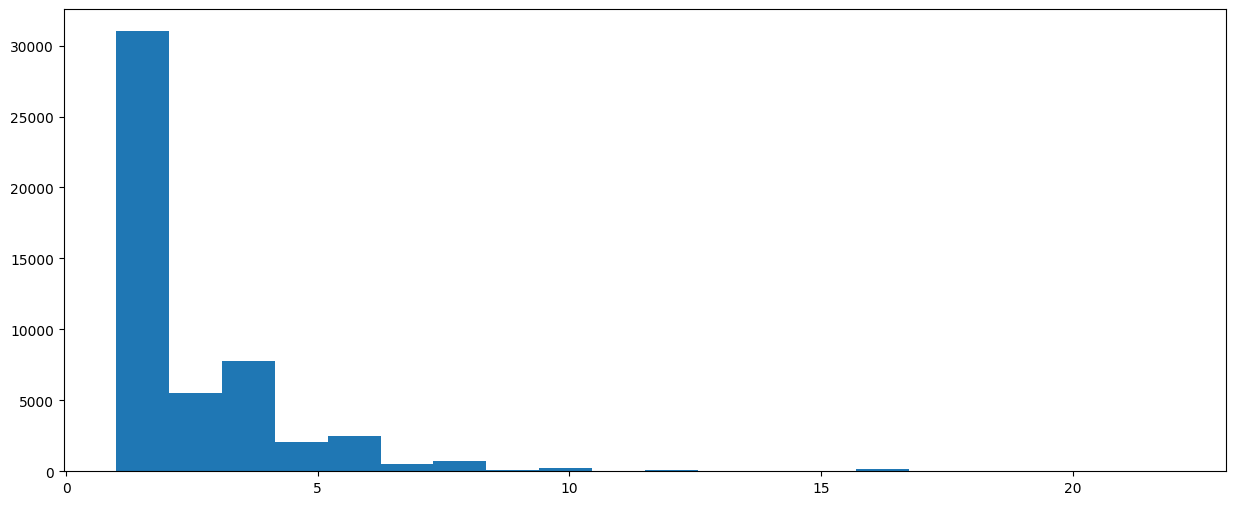

In [18]:
# Q10

plt.figure(figsize=(15, 6))
plt.hist(df['accommodates'], bins=20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

In [19]:
df['price'][0:1001]

0       100
1       225
2        89
3       200
4        94
       ... 
996     150
997     235
998     100
999     311
1000     39
Name: price, Length: 1001, dtype: int64

(0.0, 1000.0)

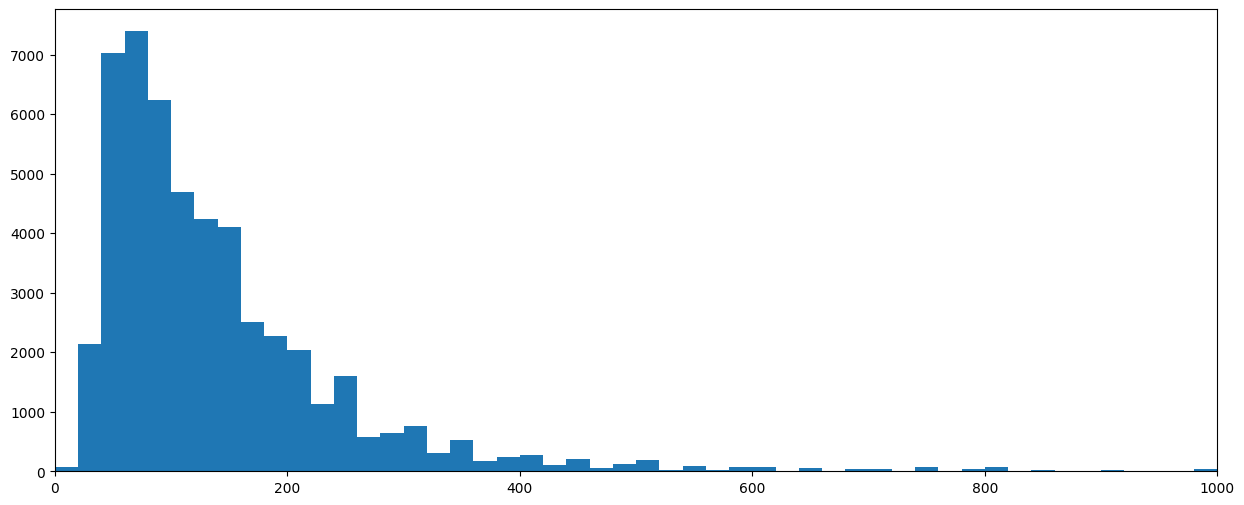

In [20]:
# Q11

plt.figure(figsize=(15, 6))
plt.hist(df['price'], bins=500)
plt.xlim(0, 1000)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [32]:
df = pd.read_csv("C:/Users/minjeong/Downloads/airbnb_listings.csv", index_col=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17756\249448268.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/minjeong/Downloads/airbnb_listings.csv", index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [34]:
#Q12

# 결측치 비율 계산
missing_percent = df.isnull().mean()

# 결측치 비율에 따라 처리
for col in df.columns:
    if missing_percent[col] >= 0.25:
        df.drop(col, axis=1, inplace=True)
    elif missing_percent[col] >= 0.10 and missing_percent[col] < 0.25:
        df.dropna(subset=[col], inplace=True)
    else:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            mode_value = df[col].mode()
            df[col].fillna(mode_value, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39291 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39291 non-null  object 
 8   latitude                          39291 non-null  float64
 9   longitude                         39291 non-null  float64
 10  is_location_exact                 39291 non-null  object 
 11  property_type                     39291 non-null  object 
 12  room_type

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [48]:
#Q13-1) neighborhood별 cancellation_policy 변수 생성
#cancellation_policy 민감도에 따른 고객 분류를 위하여 관련 변수를 계산해보았다.

df.groupby(['neighborhood',"cancellation_policy"])["cancellation_policy"].count() / df.groupby('neighborhood')["neighborhood"].count()

neighborhood   cancellation_policy        
Bronx          flexible                       0.254509
               moderate                       0.306613
               strict_14_with_grace_period    0.438878
Brooklyn       flexible                       0.247354
               moderate                       0.278617
               strict                         0.000061
               strict_14_with_grace_period    0.473906
               super_strict_30                0.000061
Manhattan      flexible                       0.209260
               moderate                       0.226037
               strict                         0.001203
               strict_14_with_grace_period    0.561455
               super_strict_30                0.001263
               super_strict_60                0.000782
Queens         flexible                       0.263936
               moderate                       0.284715
               strict                         0.000200
               strict_

In [102]:
#Q13-2) 호스트의 총 리뷰 개수/ 한달 평균 리뷰 수
#해당 변수를 통해 대략적인 총 이용기간을 예측할 수 있을 것이다.

df['number_of_period'] = df['number_of_reviews']/df['reviews_per_month']
df['number_of_period'] 

1        126.315789
2         66.454352
3        132.203390
4        133.928571
5        131.578947
            ...    
50490      1.000000
50526      1.000000
50598      1.000000
50650      1.000000
50694      1.000000
Name: number_of_period, Length: 39291, dtype: float64

In [98]:
#Q13-3) 리뷰가 10, 9, 8점 이하인 그룹 분할
#대부분의 리뷰 점수가 9점과 10점에 집중되어 있어서, 8점 이하의 항목들을 하나의 그룹으로 지정하였다.

df['review_value'] = "None"
df['review_value'] [df['review_scores_value']==10.0] = '10점'
df['review_value'] [df['review_scores_value']==9.0] = '9점'
df['review_value'] [df['review_scores_value']<=8.0] = '8점 이하'

df.groupby('review_value')['review_value'].count()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17756\2780530210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_value'] [df['review_scores_value']==10.0] = '10점'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17756\2780530210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_value'] [df['review_scores_value']==9.0] = '9점'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17756\2780530210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

review_value
10점      21937
8점 이하     3999
9점       13355
Name: review_value, dtype: int64

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
